In [1]:
#Perceptron Classifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]    #Petal length and width
y = (iris.target == 0).astype(np.int)  #iris Sentosa?

per_clf = Perceptron()
per_clf.fit(X, y)

per_clf.predict([[2,0.5]])

array([0])

In [3]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# Image Classifier using sequential API

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
#Creating a validation Set and scaling pixel values
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.


class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(class_names[y_train[0]])

Coat


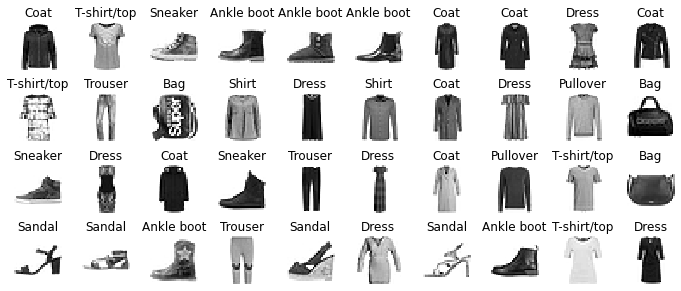

In [5]:
# Viewing some of the images

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [6]:
# Building the neural Network

#model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape = [28,28]))
#model.add(keras.layers.Dense(300, activation = "relu"))
#model.add(keras.layers.Dense(100, activation = "relu"))
#model.add(keras.layers.Dense(10, activation = "softmax"))

#OR

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

print(model.summary())
print(model.layers)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None
[<tensorflow.python.keras.layers.core.Flatten object at 0x00000198FAA2C580>, <tensorflow.python.keras.layers.core.Dense object at 0x00000198FABF4910>, <tensorflow.python.keras.layers.core.Dense object at 0x00000198FABF4C70>, <tensorflow.python

In [7]:
# Accessing the weights of a layer
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[ 0.04641276 -0.0581965   0.03888436 ... -0.01250721  0.00161739
  -0.03230113]
 [ 0.07057263  0.06783445 -0.02088216 ... -0.0188666   0.05734955
   0.02835902]
 [ 0.01224958 -0.05818034  0.06895688 ...  0.07023484 -0.02664582
   0.02320789]
 ...
 [-0.00047223 -0.0092994  -0.01808672 ...  0.0047952  -0.0175021
   0.04462425]
 [-0.01149853  0.04687606 -0.01675913 ...  0.04463702 -0.06854471
   0.0198927 ]
 [ 0.03619748 -0.01790744  0.04808952 ... -0.00872788  0.01577722
   0.00528056]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [8]:
# Compiling the model

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [9]:
#Training the model

history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7210 - accuracy: 0.7633 - val_loss: 0.5064 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4899 - accuracy: 0.8282 - val_loss: 0.5143 - val_accuracy: 0.8092
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4442 - accuracy: 0.8441 - val_loss: 0.4128 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4158 - accuracy: 0.8543 - val_loss: 0.4007 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3955 - accuracy: 0.8610 - val_loss: 0.4000 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3785 - accuracy: 0.8666 - val_loss: 0.3872 - val_accuracy: 0.8654
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3657 - accuracy: 0.8707 - val_loss: 0.3738 - val_accuracy

In [10]:
print(history.params)
print(history.epoch)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


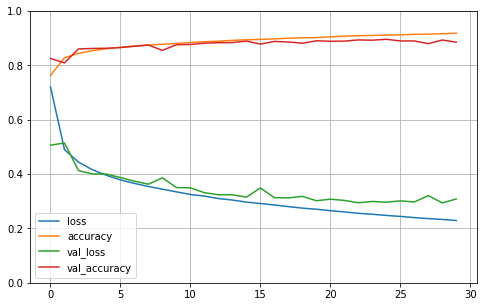

In [11]:
#Plotting the learning curves

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [12]:
#Evaluating model

model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8754


[0.3494890630245209, 0.8754000067710876]

In [13]:
#Making new predictions

X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[[0.   0.   0.   0.   0.   0.01 0.   0.03 0.   0.97]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [20]:
# Regression MLP using Sequential API
#Importing and scaling data

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
model = keras.models.Sequential([keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:] ),
                                keras.layers.Dense(1)])
OGModel = model
model.compile(loss = "mean_squared_error", optimizer = "sgd")

history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

print(mse_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8463 - val_loss: 1.9267
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4547 - val_loss: 1.4331
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4188 - val_loss: 0.4440
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4019 - val_loss: 0.4398
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4040 - val_loss: 0.4286
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3895 - val_loss: 0.4470
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3868 - val_loss: 0.4179
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3805 - val_loss: 0.4081
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3760 - val_loss: 0.4259
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3738 - val_loss: 0.3963

In [25]:
# Building using functional API
#All features go through deep and wide layers

input = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs = [input], outputs = [output])

In [28]:
#Multiple inputs
#A subset of features to wide and a subset to deep
#This requires having 2 inputs 

input_a = keras.layers.Input(shape = [5])
input_b = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_b)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_a, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs = [input_a, input_b], outputs = [output])
model.compile(loss = "mse", optimizer = "sgd")

In [29]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs = 20, validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

print(mse_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7747 - val_loss: 0.4715
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4277 - val_loss: 0.6785
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4124 - val_loss: 1.5490
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4357 - val_loss: 0.6129
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3917 - val_loss: 0.6008
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3948 - val_loss: 0.4061
Epoch 7/20
363/363 [==============================] - ETA: 0s - loss: 0.383 - 1s 2ms/step - loss: 0.3857 - val_loss: 0.4566
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3754 - val_loss: 0.4244
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3714 - val_loss: 0.4542
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0

In [30]:
#Multiple outputs
input_a = keras.layers.Input(shape = [5])
input_b = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_b)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_a, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs = [input_a, input_b], outputs = [output, aux_output])
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = "sgd")

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

print("Total Loss", total_loss)
print("Main Loss", main_loss)
print("Aux Loss", aux_loss)

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9423 - dense_26_loss: 0.7976 - dense_27_loss: 2.2452 - val_loss: 1.2407 - val_dense_26_loss: 1.0908 - val_dense_27_loss: 2.5897
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5073 - dense_26_loss: 0.4415 - dense_27_loss: 1.0994 - val_loss: 0.9379 - val_dense_26_loss: 0.9191 - val_dense_27_loss: 1.1079
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4715 - dense_26_loss: 0.4226 - dense_27_loss: 0.9118 - val_loss: 0.5054 - val_dense_26_loss: 0.4556 - val_dense_27_loss: 0.9538
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4576 - dense_26_loss: 0.4203 - dense_27_loss: 0.7933 - val_loss: 0.4782 - val_dense_26_loss: 0.4377 - val_dense_27_loss: 0.8425
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4331 - dense_26_loss: 0.4008 - dense_27_loss: 0.7236 - val_loss: 0.4658 - val_dense_26_loss: 0.4324 - val_de

In [31]:
#Dynamic models using Subclassing API

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

#However always use sequential or functional API unless you need this extra flexibility

In [32]:
#Saving and loading a model

#model.save("name.h5")

#model = keras.models.load_model("name.h5")

In [34]:
#Using callbacks

#[...] # build and compile the model
#checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
#history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])


#Finding the best model using early stopping

#checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
#history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])
#model = keras.models.load_model("my_keras_model.h5") # rollback to best model


#Another way to implement early stopping

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])

In [37]:
#Visualization using TensorBoard

#Making log directory
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


In [41]:
run_logdir = get_run_logdir()
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid),callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 1.4721 - val_loss: 1.2913
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6314 - val_loss: 0.7057
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5757 - val_loss: 0.5995
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5424 - val_loss: 0.5748
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5168 - val_loss: 0.5415
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4948 - val_loss: 0.5272
Epoch 7/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4771 - val_loss: 0.5133
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4619 - val_loss: 0.5038
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4490 - val_loss: 0.5049
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4388 - val_loss: 0.5132

In [42]:
run_logdir2 = get_run_logdir()
run_logdir2

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5332 - val_loss: 0.4223
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3891 - val_loss: 2.4384
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3815 - val_loss: 0.4193
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3526 - val_loss: 0.3614
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3340 - val_loss: 0.6018
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3288 - val_loss: 0.4239
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3229 - val_loss: 0.3537
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3155 - val_loss: 0.3261
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3073 - val_loss: 0.3591
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3067 - val_loss: 0.3348

In [43]:
# Fine tuning the Hyperparameters of the model

#Wrapping keras models in objects that mimic scikit learn regressors

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [44]:
keras_reg.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

print(mse_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0743 - val_loss: 1.2134
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5694 - val_loss: 0.6478
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5008 - val_loss: 0.6883
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4545 - val_loss: 0.4912
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4281 - val_loss: 0.4492
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4134 - val_loss: 0.4599
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4038 - val_loss: 0.4241
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3974 - val_loss: 0.5274
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3935 - val_loss: 0.4291
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3892 - val_lo

In [48]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=25,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)])

print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

model = rnd_search_cv.best_estimator_.model

TypeError: _parse_args() missing 1 required positional argument: 'b'

In [5]:
#Batch Normalization (before activation function)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [6]:
#Parameters in a BN Layer and if they are trainable by backpropagation
[(var.name, var.trainable) for var in model.layers[1].variables]



[('batch_normalization_3/gamma:0', True),
 ('batch_normalization_3/beta:0', True),
 ('batch_normalization_3/moving_mean:0', False),
 ('batch_normalization_3/moving_variance:0', False)]

In [7]:
#Batch normalization (after activation function)

model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
 keras.layers.BatchNormalization(),
 keras.layers.Activation("elu"),
 keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
 keras.layers.Activation("elu"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(10, activation="softmax")
])

In [ ]:
#Gradient Clipping

optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)
